# Introducing `Shapely`

- `Shapely` is our library for representing vector geometries. All our geometries in `geopandas` are `Shapely` objects.

- `Shapely` is built on the C/C++ GEOS library

- Let's get acquainted with the basic shape types, and also use them to build GeoDataFrames and GeoSeries from scratch.

There is, as usual, much more you can do with this library than we'll cover here. Later we'll touch on some spatial operations, such as unions and intersections.

- For more, consult the docs at: https://shapely.readthedocs.io/en/stable/manual.html

In [57]:
#Basic libraries as usual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

## Basic geometries

There are three basic geometry types:

1. Point
2. Curve
3. Surface

These are represented in `Shapely` by classes:

1. `Point`
2. `LineString` and (the lesser used) `LinearRing`
3. `Polygon`

If we want a collection of shapes, we have the corresponding `Multi`- classes:

1. `MultiPoint`
2. `MultiLineString`
3. `MultiPolygon`

- Note: You can have a z-coordinate for a Shapely object, but it is meaningless with respect to geometric operations: Our shapes are really just **2-D (x-y)**!
- Also: Shapely objects themselves do not have any associated coordinate reference system, etc. Geometries exist in the same, simple Cartesian plane.

## Make Some Geometries...

### A Point!

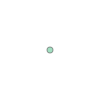

In [58]:
# A Point!
from shapely.geometry import Point

point = Point(1, 3)

#Note that we get a depiction of the point
point

In [59]:
#Printing gives:
print(point)

POINT (1 3)


In [60]:
##Behold all the attributes:
dir(point)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_interpolate

In [61]:
#One way to extract information on the point:
point.coords

In [62]:
#Can use this to get a tuple:
list(point.coords)[0]

(1.0, 3.0)

In [63]:
#Ore use the attribute xy:
point.coords.xy

(array('d', [1.0]), array('d', [3.0]))

In [65]:
#Finally this gives x:
point.coords.xy[0][0]

1.0

In [66]:
#The above feels like a bit much
#Luckily, can also use:

print(point.x)
print(point.y)

1.0
3.0


### A LineString!

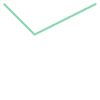

In [67]:
# A Point!
from shapely.geometry import LineString

#Can make from either points or tuples:
point1 = Point(1, 3)
point2 = Point(2, 2)
point3 = Point(4, 3)

#And our line:
line = LineString([point1, point2, point3])
line

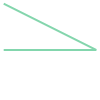

In [68]:
#From tuples:
line = LineString([(1,2), (5,0), (1,0)])
line


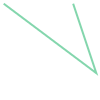

In [69]:
#From a mix:
line = LineString([point1, (5,0), point3])
line


#### Some line attributes:

In [70]:
#Again, so very many attributes:
dir(line)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_interpolate

In [71]:
line.length

8.16227766016838

(array('d', [3.581138830084189]), array('d', [1.5]))


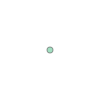

In [72]:
print(line.centroid.coords.xy)

line.centroid

In [75]:
line.xy

(array('d', [1.0, 5.0, 4.0]), array('d', [3.0, 0.0, 3.0]))

In [76]:
list(line.xy[0])

[1.0, 5.0, 4.0]

### Polygons!

- Like lines, we can construct these from either points or tuples
- Can also add holes

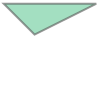

In [77]:
from shapely.geometry import Polygon

poly = Polygon([point1, point2, point3])
poly

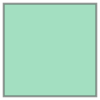

In [78]:
# A polygon with holes:

# Exterior:
exterior = [(0,0), (0, 1), (1, 1), (1,0)]

poly = Polygon(exterior)
poly

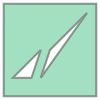

In [82]:
#Add the holes:
h1 = [(.1, .2), (.3, .2), (.4, .5)]

#Note: we could get ourselves an invalid polygon:
h2 = [(.5, .5), (.9, .9), (.4, .2)]
#vs:
#h2 = [(.2, .5), (.9, .9), (.4, .2)]

poly = Polygon(shell=exterior, holes=[h1, h2])
poly


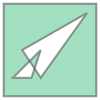

In [81]:
## For an invalid geometry, we can try to fix it with:
from shapely.validation import make_valid

make_valid(poly)

In [83]:
#If we print: Note the exterior and the holes:
print(poly)

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0), (0.1 0.2, 0.3 0.2, 0.4 0.5, 0.1 0.2), (0.5 0.5, 0.9 0.9, 0.4 0.2, 0.5 0.5))


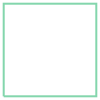

In [84]:
#Extract:
poly.exterior

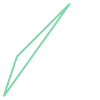

In [86]:
#Extract:
list(poly.interiors)[1]

In [87]:
#More attributes:
#####

poly.area

0.9299999999999999

In [88]:
poly.length

6.682637552399106

In [89]:
poly.exterior.length

4.0

In [90]:
poly.bounds

(0.0, 0.0, 1.0, 1.0)

In [91]:
print(poly.centroid)

POINT (0.5032258064516129 0.5050179211469534)


#### The convenient `box`:

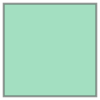

In [92]:
from shapely.geometry import box

poly = box(minx=0, miny=0, maxx=1, maxy=1)
poly

## `Multi`-Geometries

- Just pass lists of the base geometry type (Point, LineString, Polygon)...

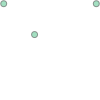

In [93]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

#MultiPoint:

point1 = Point(1, 3)
point2 = Point(2, 2)
point3 = Point(4, 3)

multi_point = MultiPoint([point1, point2, point3])
multi_point

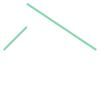

In [94]:
#MultiLineString:

ls1 = LineString([(1,1), (2,2)])
ls2 = LineString([(2,3), (5,1)])

multi_ls = MultiLineString([ls1, ls2])

multi_ls

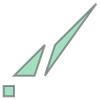

In [95]:
# MultiPolygon

p1 = Polygon([(0,0), (0, 1), (1, 1), (1,0)])
p2 = Polygon([(1, 2), (3, 2), (4, 5)])
p3 = Polygon([(5, 5), (9, 9), (4, 2)])
             
multi_poly = MultiPolygon([p1, p2, p3])
multi_poly

## Build a GeoSeries

`geopandas.GeoSeries(data=None, index=None, crs=None)`

- We pass a list of shapely geometries as the data, optionally define the index, and can also specify a CRS

Let's construct a GeoSeries with three elements:

In [96]:

p1 = Polygon([(-10,-10), (-10, 10), (10, 10), (10,-10)])
p2 = Polygon([(10, 40), (30, 40), (40, 70)])
p3 = Polygon([(50, 60), (110, 70), (40, 20)])
             

#Make our GeoSeries, use CRS 4326, geographic CRS so these just represent lat/lon in degrees
gs = gpd.GeoSeries(data=[p1, p2, p3], crs = 4326)

<AxesSubplot: >

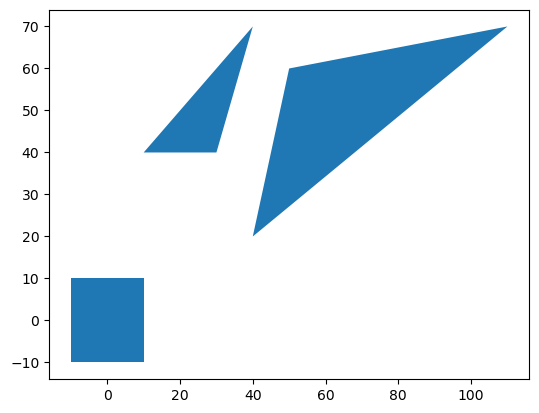

In [97]:
#Can plot now:
gs.plot()

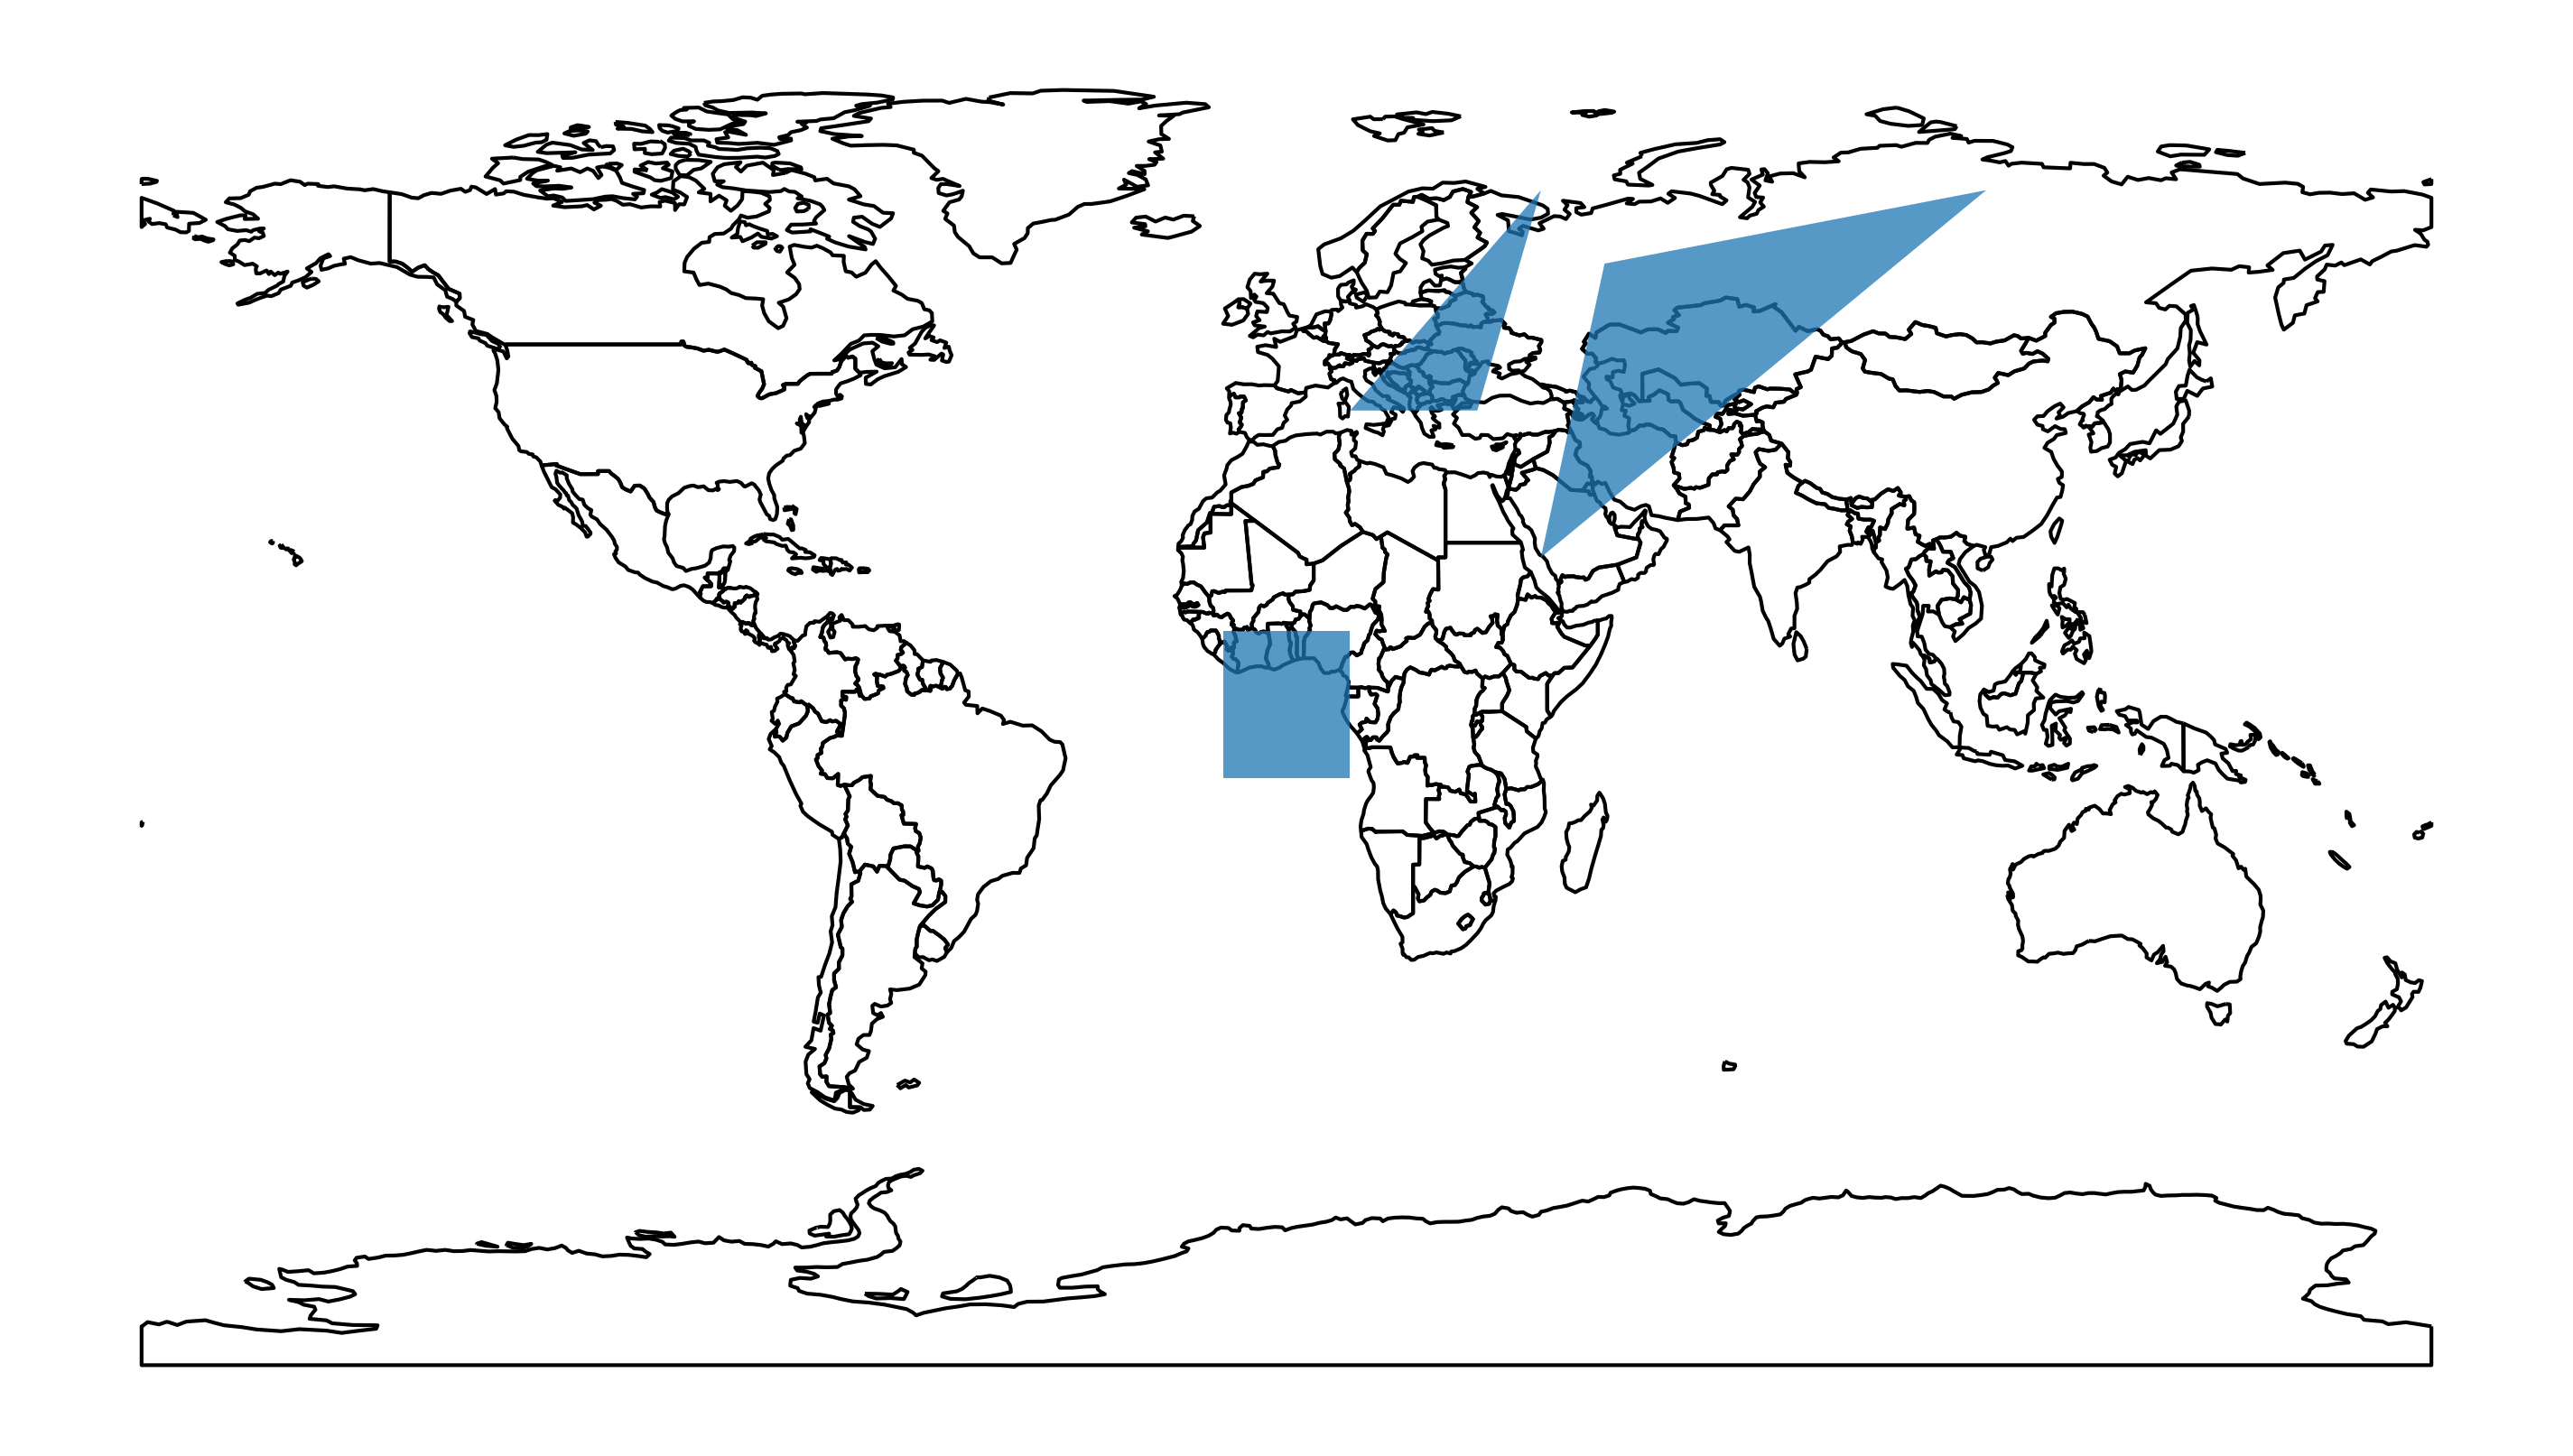

In [98]:
# And put in a scene with our world map:
#####
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig1, ax1 = plt.subplots(1, 1, figsize=(12,8), dpi=300)

world.plot(ax = ax1, facecolor='none', edgecolor='black')
gs.plot(ax=ax1, alpha=.75)

ax1.set_axis_off()

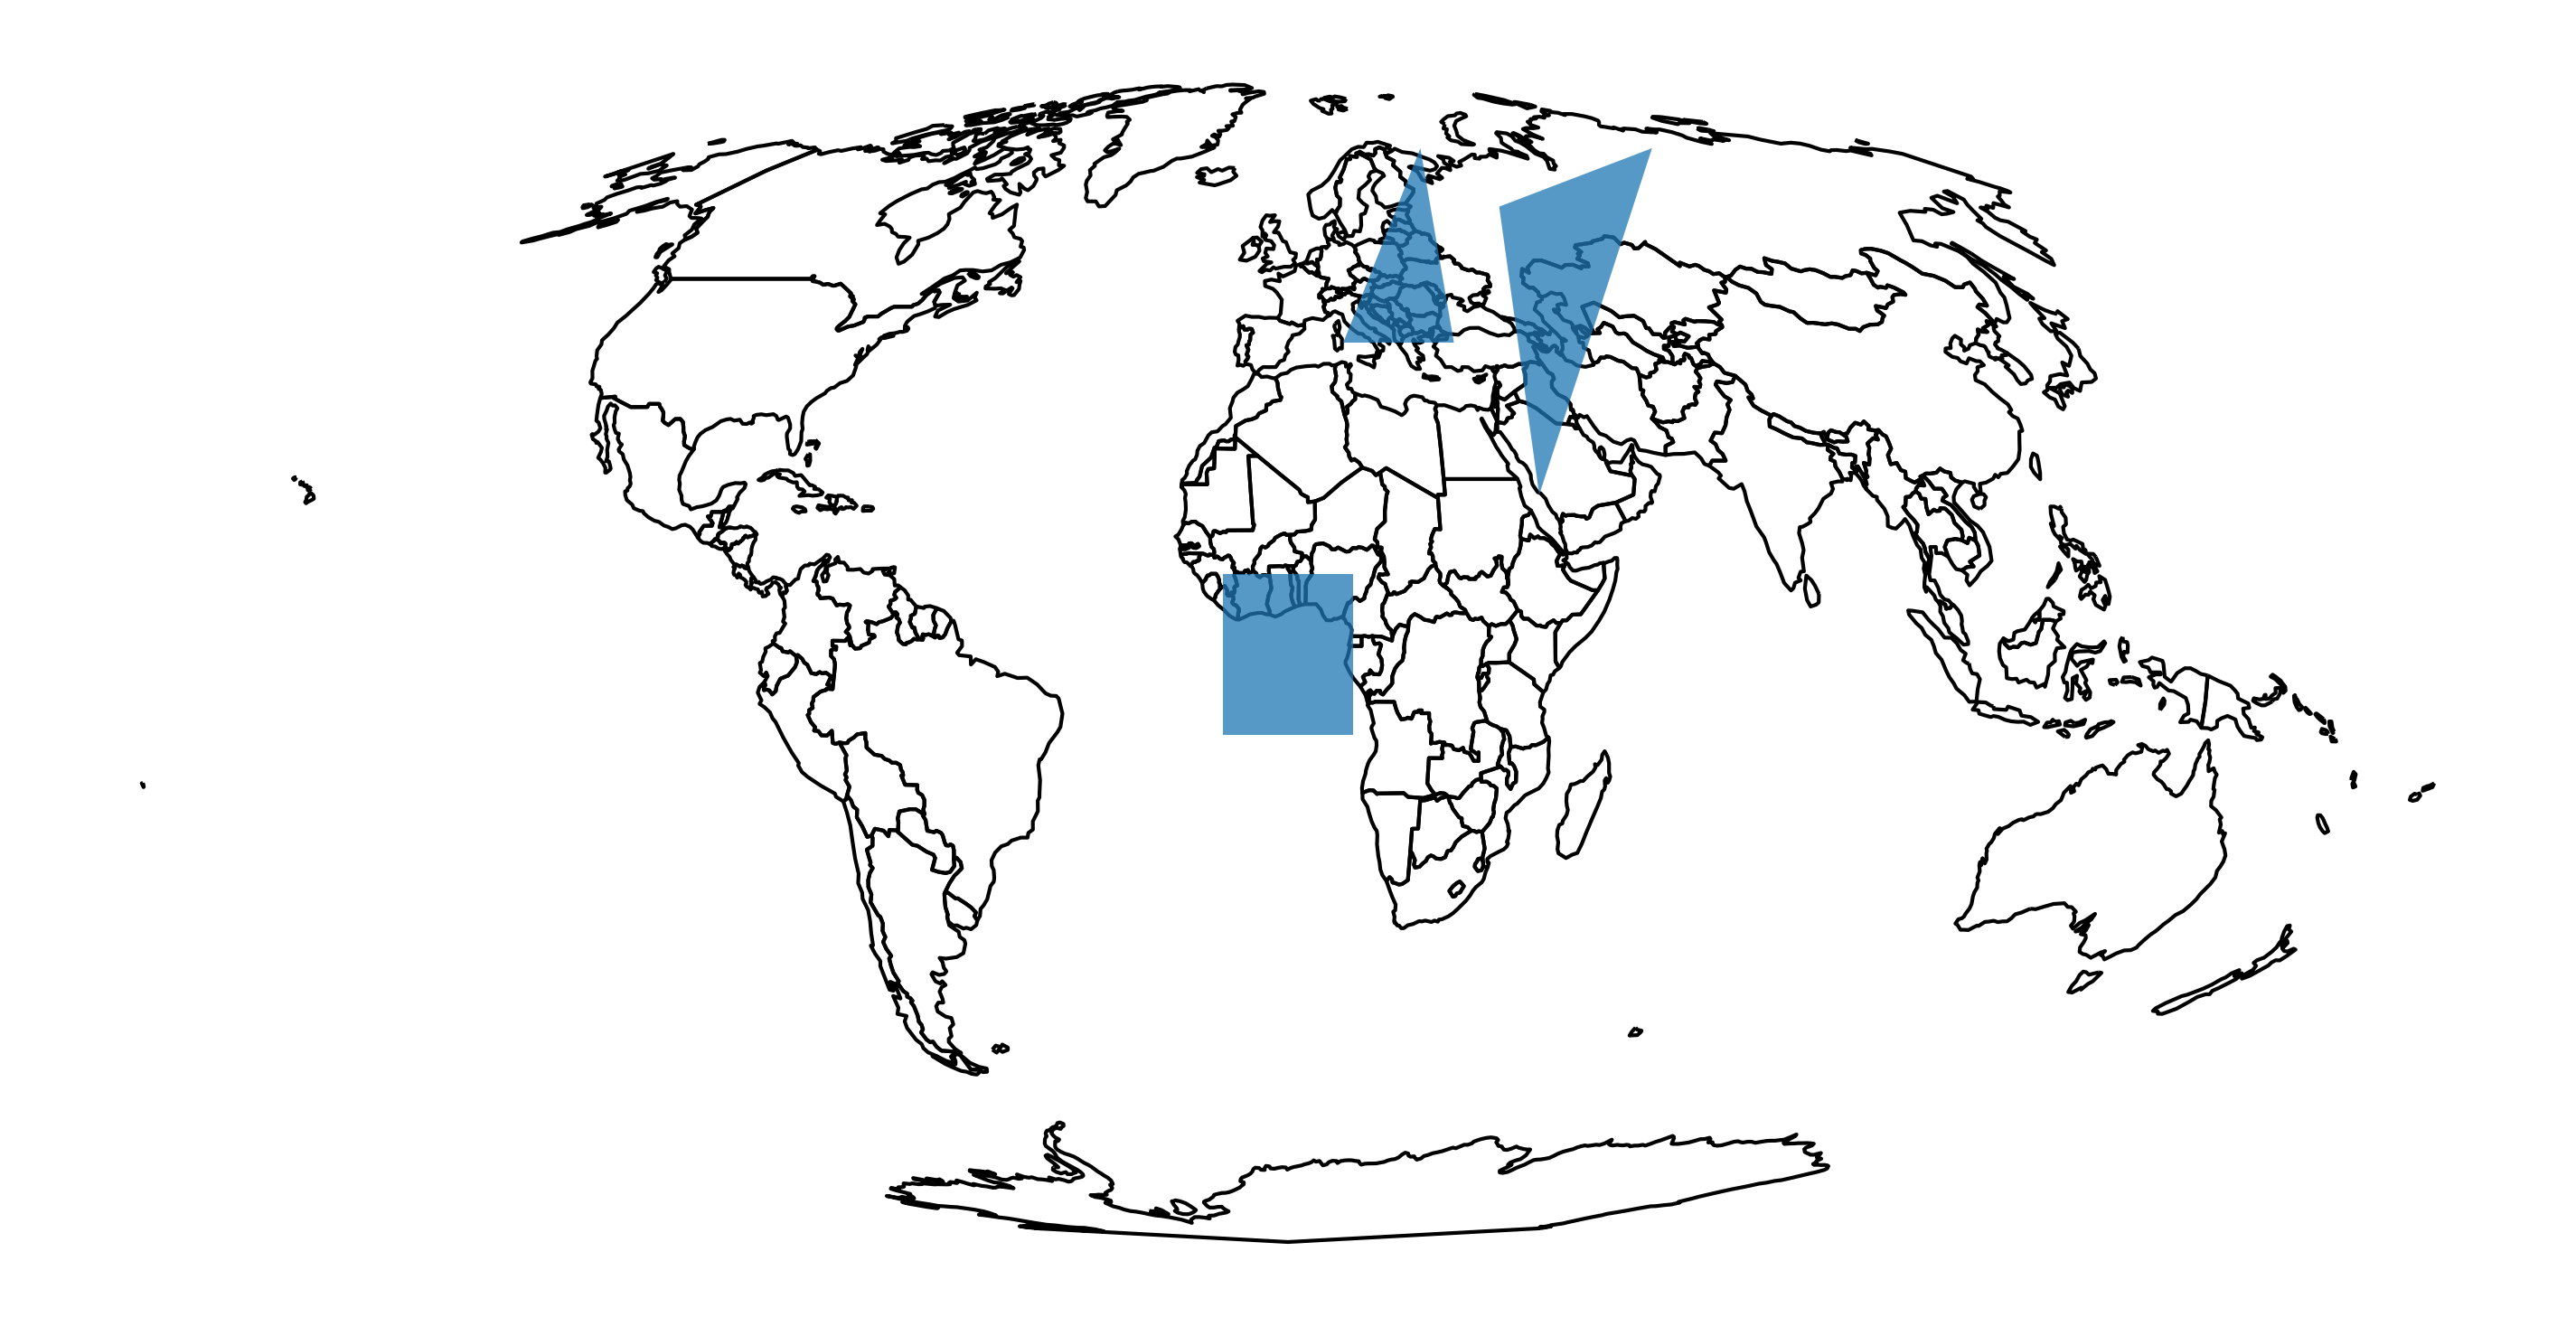

In [99]:
## Now we can switch projection: Mollweide is ESRI:54009
###
world = world.to_crs('ESRI:54009')
gs = gs.to_crs('ESRI:54009')


fig1, ax1 = plt.subplots(1, 1, figsize=(12,8), dpi=300)

world.plot(ax = ax1, facecolor='none', edgecolor='black')
gs.plot(ax=ax1, alpha=.75)

ax1.set_axis_off()

## And Make a GeoDataFrame

`geopandas.GeoDataFrame(data=None, *args, geometry=None, crs=None, **kwargs)`


In [100]:
#Make our GeoDataFrame, again use EPSG 4326 as CRS
#Just some dummy values

gdf = gpd.GeoDataFrame(data = {'Value1':[1,2,3], 'Value2':[1,2,3]}, geometry=[p1, p2, p3], crs = 4326)

gdf

,Value1,Value2,geometry
0,1,1,"POLYGON ((-10.00000 -10.00000, -10.00000 10.00..."
1,2,2,"POLYGON ((10.00000 40.00000, 30.00000 40.00000..."
2,3,3,"POLYGON ((50.00000 60.00000, 110.00000 70.0000..."


In [101]:
#Could also use the GeoSeries for the geometry:
#Put it back in EPSG 4326:
gs = gs.to_crs(4326)


gdf = gpd.GeoDataFrame(data = {'Value1':[1,2,3], 'Value2':[1,2,3]}, geometry=gs, crs = 4326)

gdf

,Value1,Value2,geometry
0,1,1,"POLYGON ((-10.00000 -10.00000, -10.00000 10.00..."
1,2,2,"POLYGON ((10.00000 40.00000, 30.00000 40.00000..."
2,3,3,"POLYGON ((50.00000 60.00000, 110.00000 70.0000..."


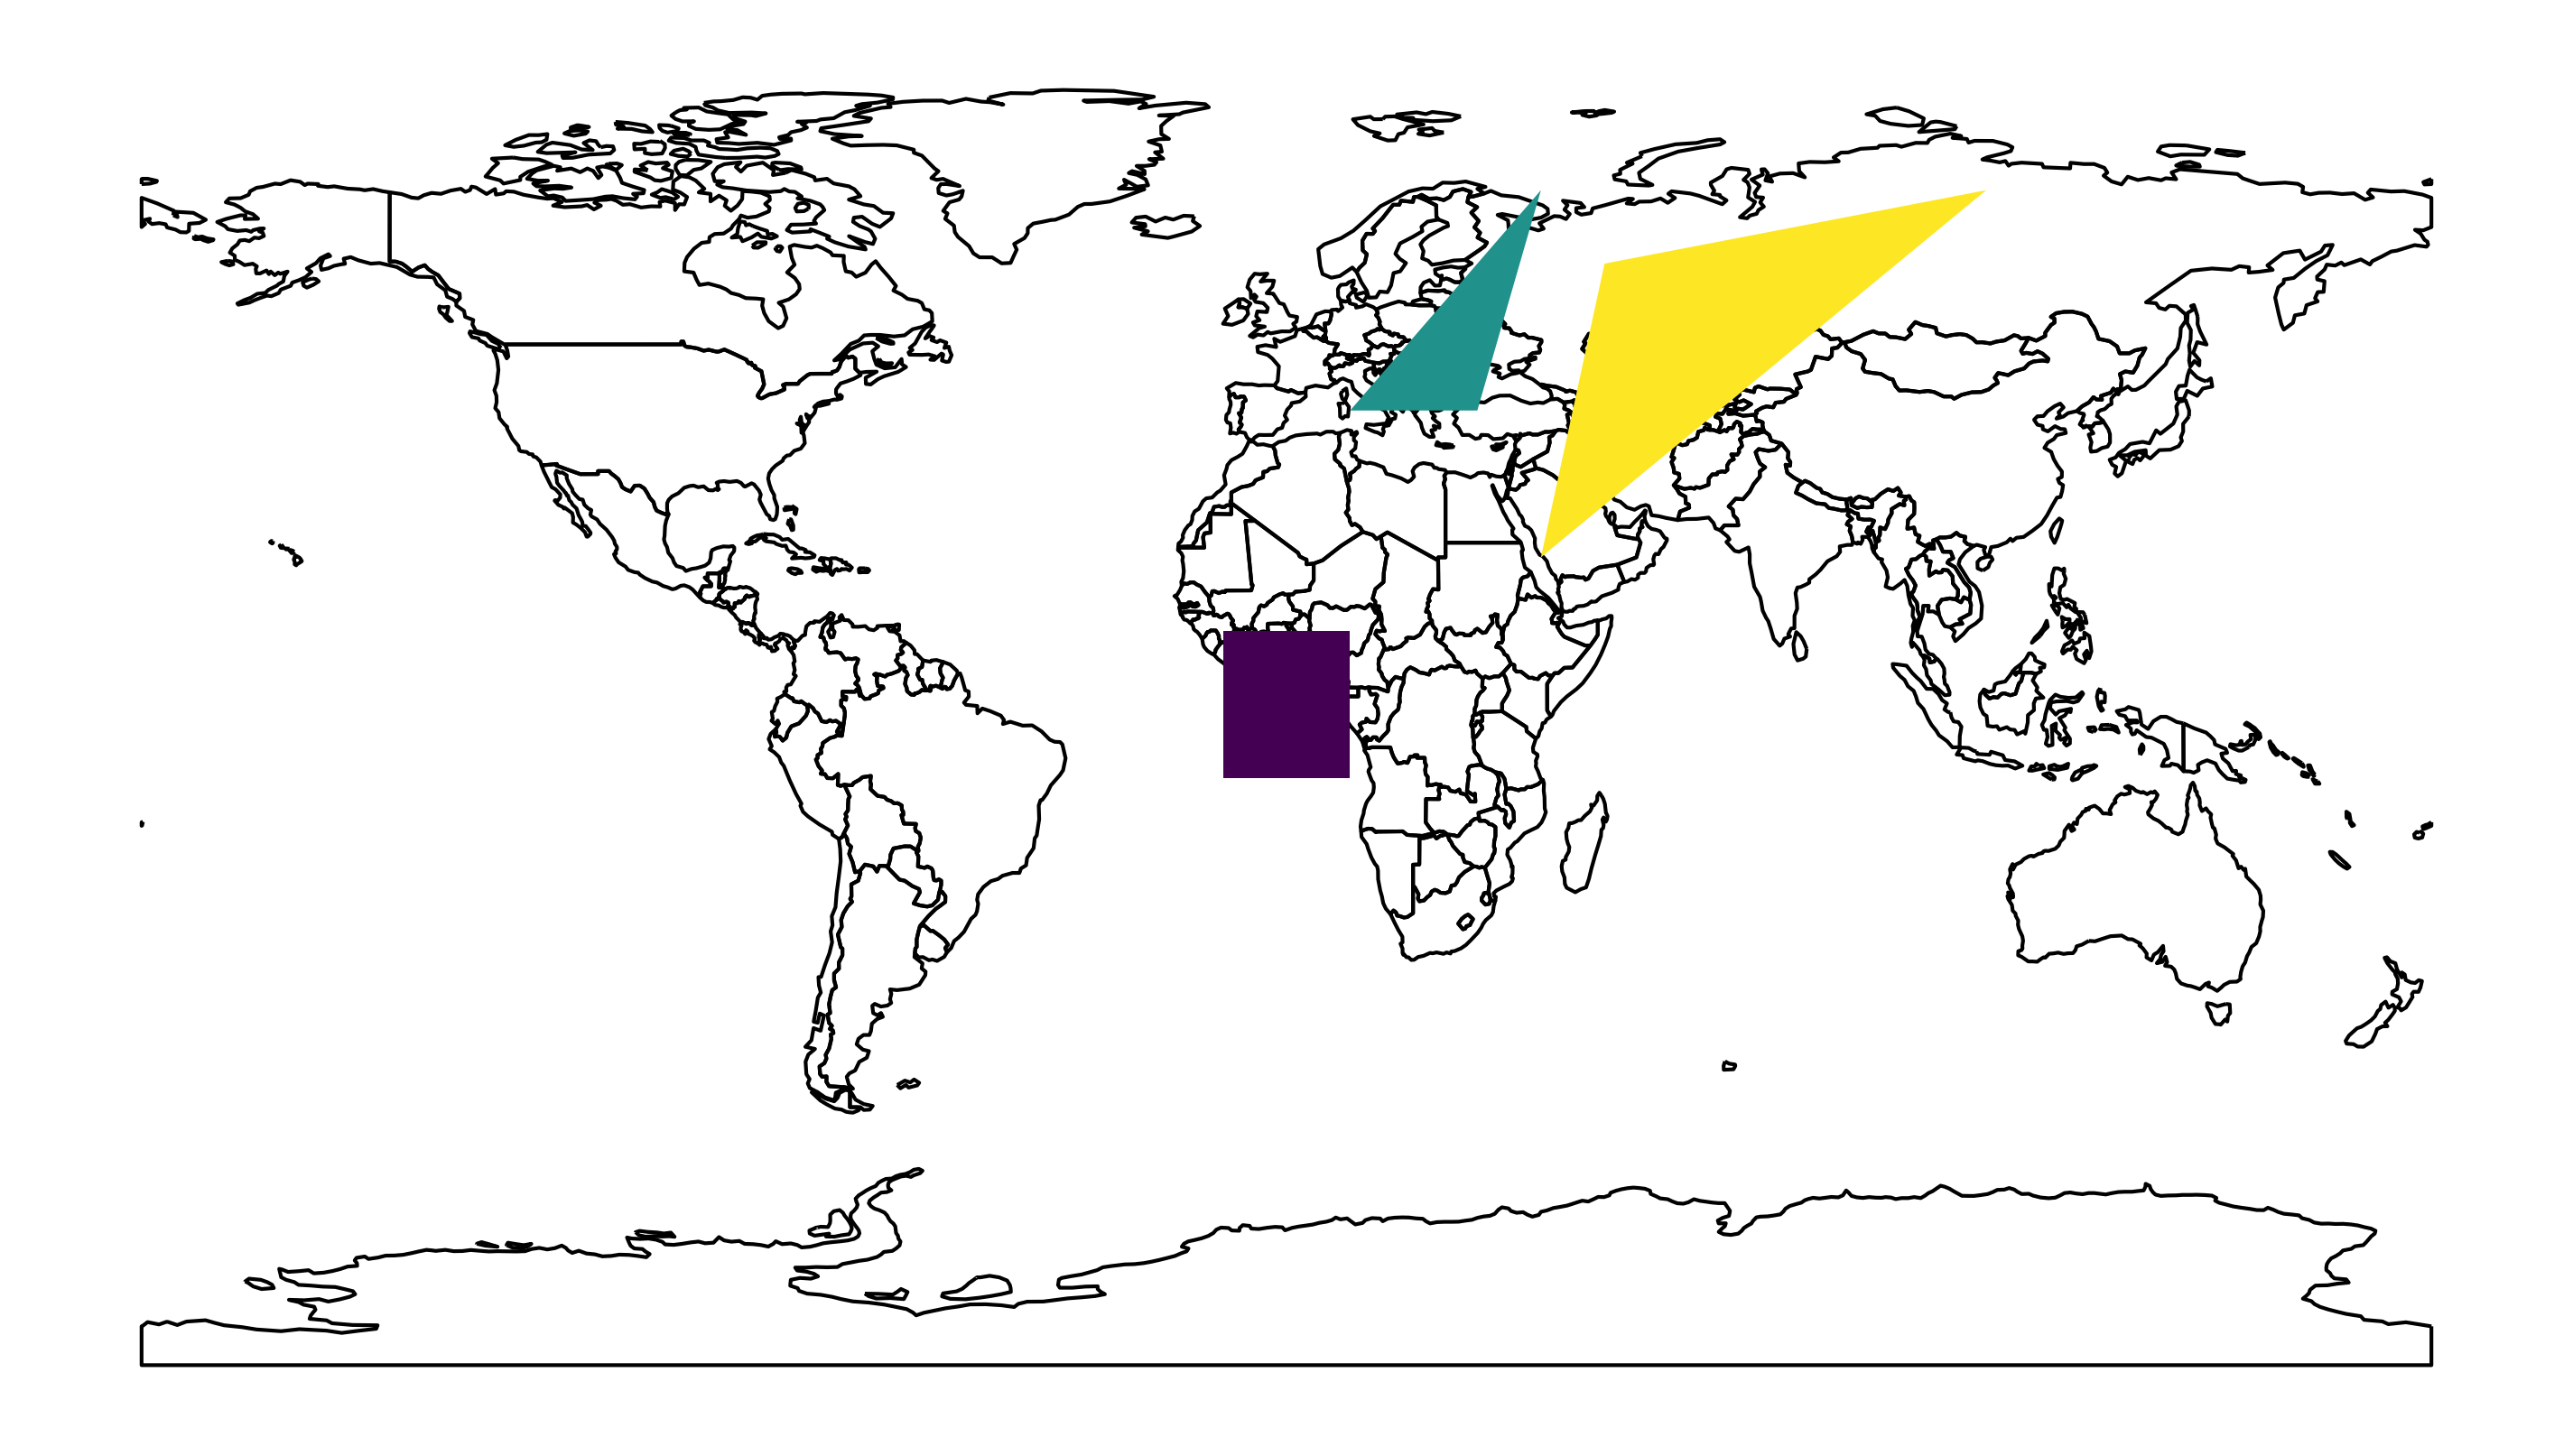

In [102]:
# And plot again:
####
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig1, ax1 = plt.subplots(1, 1, figsize=(12,8), dpi=300)

world.plot(ax = ax1, facecolor='none', edgecolor='black')
gdf.plot(ax=ax1, column='Value1', alpha=1)

ax1.set_axis_off()